# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений
## Подготовил: Аббазов Валерьян
### Группа: 1191б/1

## Задание 1. Первичный анализ данных c Pandas
В этом заданиии мы будем использовать данные SOCR по росту и весу 25 тысяч подростков.

**[1].** Импорт библиотек

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Считаем данные по росту и весу (weights_heights.csv, приложенный в задании) в объект Pandas DataFrame:

In [25]:
data = pd.read_csv('./data/weights_heights.csv', index_col='Index')

 Построим гистограмму распределения роста подростков из выборки data. Используем метод plot для DataFrame data c аргументами y='Height' (это тот признак, распределение которого мы строим):

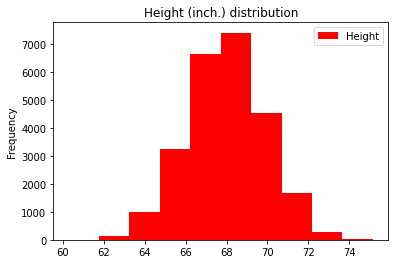

In [31]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution');

Аргументы:
* y='Height' - тот признак, распределение которого мы строим
* kind='hist' - означает, что строится гистограмма
* color='red' - цвет

**[2].** Посмотрим на первые 5 записей с помощью метода head Pandas DataFrame.

In [5]:
data.head(5)

Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971

Нарисуем гистограмму распределения веса с помощью метода plot Pandas DataFrame

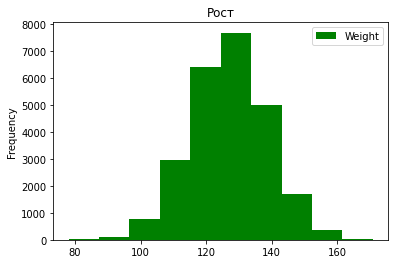

In [6]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Рост');

Аргументы:
* y='Weight' - тот признак, распределение которого мы строим
* kind='hist' - означает, что строится гистограмма
* color='green' - цвет

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается  m×m  графиков (m - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода  scatter_matrix  Pandas Data Frame или pairplot библиотеки Seaborn.

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак Индекс массы тела (BMI). Для этого воспользуемся удобной связкой метода apply Pandas DataFrame и lambda-функций Python.

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

In [9]:
data

Height    Weight        BMI
Index                               
1      65.78331  112.9925  18.357573
2      71.51521  136.4873  18.762577
3      69.39874  153.0269  22.338895
4      68.21660  142.3354  21.504526
5      67.78781  144.2971  22.077581
...         ...       ...        ...
24996  69.50215  118.0312  17.178982
24997  64.54826  120.1932  20.281866
24998  64.69855  118.2655  19.863971
24999  67.52918  132.2682  20.392458
25000  68.87761  124.8740  18.506018

[25000 rows x 3 columns]

**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга.

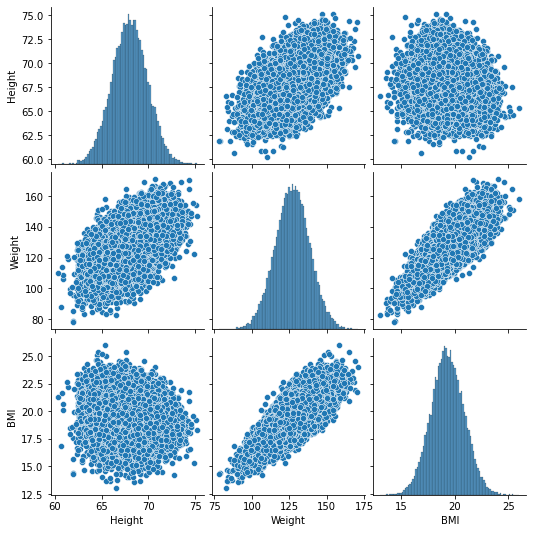

In [10]:
sns.pairplot(data);

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других.

**[4].** Создайте в DataFrame data новый признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод boxplot библиотеки Seaborn и метод apply Pandas DataFrame. Подпишите ось y меткой «Рост», ось x – меткой «Весовая категория».

In [11]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 2
    else:
        return 3

data['weight_cat'] = data['Weight'].apply(weight_category)

In [12]:
data['weight_cat'].value_counts()

3    17636
1     6738
2      626
Name: weight_cat, dtype: int64

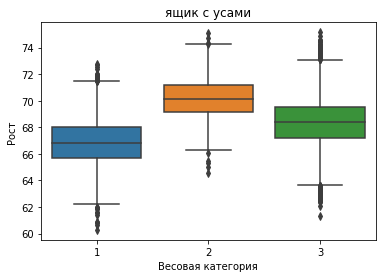

In [13]:
data_boxplot = sns.boxplot(x='weight_cat', y='Height', data=data)
data_boxplot.set_xlabel('Весовая категория')
data_boxplot.set_ylabel('Рост')
data_boxplot.set_title('ящик с усами');

**[5].** Постройте scatter plot зависимости роста от веса, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

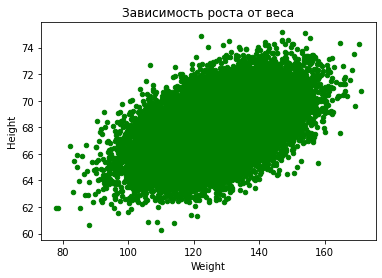

In [14]:
data.plot(x='Weight', y='Height', kind='scatter',
           color='green',  title='Зависимость роста от веса');

## Задание 2. Минимизация квадратичной ошибки


В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки.

**[6].** Напишите функцию, которая по двум параметрам  w0  и  w1  вычисляет квадратичную ошибку приближения зависимости роста  y  от веса  x  прямой линией  y=w0+w1∗x :

![error(w0,w1)=∑i=1n(yi−(w0+w1∗xi))2](./data/formula_1.jpg)

Здесь  n  – число наблюдений в наборе данных,  yi  и  xi  – рост и вес  i -ого человека в наборе данных.

In [15]:
def y_line(w_0,w_1,x):
    return w_0 + w_1*x


def calc_error(w):
    err = 0
    for y,x in zip(data['Height'],data['Weight']) :
        err += (y - y_line(w[0],w[1],x))**2
    return err

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ( w0,w1)=(60,0.05)  и ( w0,w1)=(50,0.16) . Используйте метод plot из matplotlib.pyplot, а также метод linspace библиотеки NumPy. Подпишите оси и график.

In [27]:
def get_plot(list_params):
    data.plot(x='Weight', y='Height', kind='scatter',
              color='green',  title='Зависимость роста от веса')
    x_range = np.linspace(40, 200, 100)
    colors_list = ['red', 'blue']
    for w,color in zip(list_params, colors_list):
        y_range = [y_line(w[0], w[1], x) for x in x_range]
        plt.plot(x_range, y_range, color = color )
    plt.ylim(55,80)
    plt.xlim(40,200)
    plt.grid()
    plt.show();

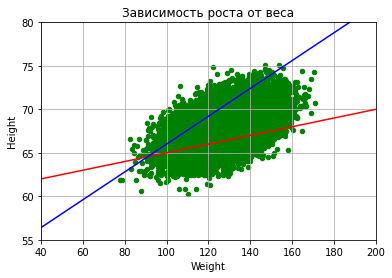

In [17]:
get_plot([[60,0.05],[50,0.16]])

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра  w1  при  w0  = 50. Подпишите оси и график.

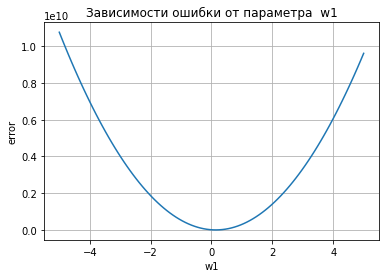

In [18]:
w_0 = 50
w_1 = np.linspace(-5, 5, 100)
errors = [calc_error([w_0, _]) for _ in w_1]
plt.plot(w_1, errors)
plt.title('Зависимости ошибки от параметра  w1')
plt.xlabel('w1')
plt.ylabel('error')
plt.grid()
plt.show();

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте  w0=50 .

**[9].** С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра  w1  в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ( w0 ,  w1 ) = (50,  w1_opt ), где  w1_opt  – найденное в п. 8 оптимальное значение параметра  w1 .

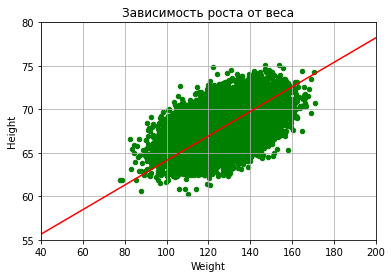

w1_opt = 0.14109203728834382


In [19]:
w0 = 50
w1_opt = optimize.minimize_scalar(lambda x: calc_error([w0, x]), bounds = [-5, 5]).x
get_plot([[w0,w1_opt]])
print('w1_opt =', w1_opt)

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме.

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции  z(x,y)=sin(√(x^2^+y^2^)) для значений x и y из интервала [-5,5] c шагом 0.25.
Создаем объекты типа matplotlib.figure.Figure (рисунок) и matplotlib.axes._subplots.Axes3DSubplot (ось).

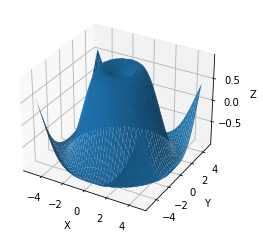

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У.
# Используем метод meshgrid, при котором по векторам координат
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров  w0  и  w1 . Подпишите ось  x  меткой «Intercept», ось  y  – меткой «Slope», a ось  z  – меткой «Error».

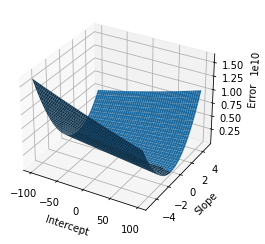

In [21]:
fig = plt.figure()
# fig.set_size_inches(13.5, 7.5)
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У.
# Используем метод meshgrid, при котором по векторам координат
# создается матрица координат. Задаем нужную функцию Z(x, y).
w_0 = np.arange(-100, 100, 0.25)
w_1 = np.arange(-5, 5, 0.25)
w_0, w_1 = np.meshgrid(w_0, w_1)
errors = calc_error([w_0, w_1])

# # Наконец, используем метод *plot_surface* объекта
# # типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(w_0, w_1, errors)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show();

**[11].** С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра  w0  в диапазоне [-100,100] и  w1  - в диапазоне [-5, 5]. Начальная точка – ( w0 ,  w1 ) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров  w0  и  w1 . Подпишите оси и график.

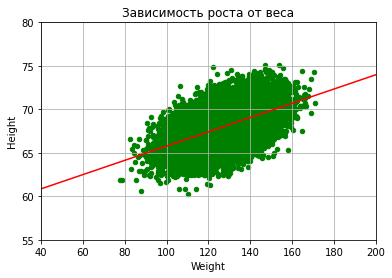

w0_opt = 57.57180618235432, 
w1_opt = 0.08200625596319751


In [22]:
w0_opt, w1_opt = optimize.minimize(calc_error, (0,0), bounds = [(-100, 100), (-5, 5)], method = 'L-BFGS-B').x
get_plot([(w0_opt, w1_opt)])
print('w0_opt = {}, \nw1_opt = {}'.format(w0_opt,w1_opt))